In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
colors = pd.read_csv('/Users/slp22/code/Datasets_5Sep2024/colors.csv')
sets = pd.read_csv('/Users/slp22/code/Datasets_5Sep2024/sets.csv')
inventory_parts = pd.read_csv('/Users/slp22/code/Datasets_5Sep2024/inventory_parts.csv')
inventories = pd.read_csv('/Users/slp22/code/Datasets_5Sep2024/inventories.csv')
parts = pd.read_csv('/Users/slp22/code/Datasets_5Sep2024/parts.csv')
themes = pd.read_csv('/Users/slp22/code/Datasets_5Sep2024/themes.csv')
part_categories = pd.read_csv('/Users/slp22/code/Datasets_5Sep2024/part_categories.csv')
inventory_sets = pd.read_csv('/Users/slp22/code/Datasets_5Sep2024/inventory_sets.csv')

In [ ]:
colors.head()

In [ ]:
sets.head()

In [ ]:
# inventory_parts.head()

In [ ]:
# inventories.head()

In [ ]:
# parts.head()

In [ ]:
# themes.head()

In [ ]:
# part_categories.head()

In [ ]:
# inventory_sets.head()

In [ ]:
sets.describe()

In [ ]:
sets.dtypes

In [ ]:
# print('colors.shape:', colors.shape)
print('sets.shape:', sets.shape)
# print('inventory_parts.shape:', inventory_parts.shape)
# print('inventories.shape:', inventories.shape)
print('parts.shape:', parts.shape)
# print('themes.shape:', themes.shape)
# print('part_categories.shape:', part_categories.shape)
# print('inventory_sets.shape:', inventory_sets.shape)


In [ ]:
# print('colors isnull:','\n', colors.isnull().sum())
# print('\n')
print('sets isnull:','\n',sets.isnull().sum())
print('\n')
# print('inventory_parts isnull:','\n',inventory_parts.isnull().sum())
# print('\n')
# print('inventories isnull:','\n',inventories.isnull().sum())
# print('\n')
print('parts isnull:','\n',parts.isnull().sum())
print('\n')
# print('themes isnull:','\n',themes.isnull().sum())
# print('\n')
# print('part_categories isnull:','\n',part_categories.isnull().sum())
# print('\n')
# print('inventory_sets isnull:','\n',inventory_sets.isnull().sum())

In [ ]:
sets.describe()

In [ ]:
parts.describe()

In [ ]:
# what were the first few years?

# early_sets = sets.sort_values(by=['year'])
# early_sets.head(20)
early_sets = sets[sets['year'] < 1951]
early_sets

In [ ]:
# what's planned for 2025?
yr_2025 = sets[sets['year'] > 2024]
yr_2025

In [ ]:
# what items have num_parts=0?
zero_parts = sets[sets['num_parts'] < 1]
# zero_parts

In [ ]:
# parts.sort_values(by='part_material')

In [3]:
# sets_parts = sets(year) + parts(materials)
# DataFrame.join(other, on=None, how='left', lsuffix='', rsuffix='', sort=False, validate=None)
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html#pandas.DataFrame.join

sets_parts = sets.join(parts, lsuffix='_sets', 
                       rsuffix='_parts', how='left')
sets_parts.head(2)

,set_num,name_sets,year,theme_id,num_parts,img_url,part_num,name_parts,part_cat_id,part_material
0,0003977811-1,Ninjago: Book of Adventures,2022,761,1,https://cdn.rebrickable.com/media/sets/0003977...,003381,Sticker Sheet for Set 663-1,58,Plastic
1,001-1,Gears,1965,756,43,https://cdn.rebrickable.com/media/sets/001-1.jpg,003383,"Sticker Sheet for Sets 618-1, 628-2",58,Plastic


In [ ]:
print(sets_parts.describe())
print('sets_parts.shape', sets_parts.shape)

In [4]:
# reorder columns with df.loc[:,['col_name']]

sets_parts = sets_parts.loc[:,['year','part_material','name_sets','name_parts',   'set_num', 'num_parts','part_num', 
                               'theme_id', 'part_cat_id', 'img_url']]
sets_parts.head(2)

,year,part_material,name_sets,name_parts,set_num,num_parts,part_num,theme_id,part_cat_id,img_url
0,2022,Plastic,Ninjago: Book of Adventures,Sticker Sheet for Set 663-1,0003977811-1,1,003381,761,58,https://cdn.rebrickable.com/media/sets/0003977...
1,1965,Plastic,Gears,"Sticker Sheet for Sets 618-1, 628-2",001-1,43,003383,756,58,https://cdn.rebrickable.com/media/sets/001-1.jpg


# Materials

## What materials does Lego use?


In [5]:
# materials

materials = []

for i in range(0, len(parts['part_material'])):
    if parts['part_material'][i] not in materials:
        materials.append(parts['part_material'][i])
print("Materials:", materials)

Materials: ['Plastic', 'Rubber', 'Cardboard/Paper', 'Cloth', 'Flexible Plastic', 'Metal', 'Foam']


## When did Lego introduce new materials? In how many sets? How many parts total? 

In [6]:
# plastic 

plastic = sets_parts.loc[sets_parts['part_material'].str.contains('Plastic')]
print('plastic.shape', plastic.shape)
plastic.describe()

plastic.shape (23373, 10)


,year,num_parts,theme_id,part_cat_id
count,23373.000000,23373.000000,23373.000000,23373.000000
mean,2008.781372,161.544688,464.896804,38.107089
std,13.980648,423.984818,225.908154,22.830711
min,1949.000000,0.000000,1.000000,1.000000
25%,2002.000000,1.000000,301.000000,19.000000
50%,2013.000000,28.000000,501.000000,40.000000
75%,2019.000000,136.000000,672.000000,59.000000
max,2025.000000,11695.000000,767.000000,69.000000


In [7]:
plastic_sum = plastic.sum(axis=0)
plastic_sum[5:6]

num_parts    3775784
dtype: object

In [8]:
plastic = ['Plastic', 1949, 23373, 3775784]

### Plastic started in 1949, in 23,373 sets totaling 3,775,784 parts.  

In [9]:
# rubber

rubber = sets_parts.loc[sets_parts['part_material'].str.contains('Rubber')]
print('rubber.shape:', rubber.shape)
rubber.describe()

rubber.shape: (69, 10)


,year,num_parts,theme_id,part_cat_id
count,69.000000,69.000000,69.000000,69.000000
mean,2007.565217,207.536232,436.956522,34.623188
std,15.667950,308.334882,236.824360,15.490131
min,1961.000000,0.000000,1.000000,4.000000
25%,2002.000000,12.000000,228.000000,29.000000
50%,2014.000000,66.000000,467.000000,29.000000
75%,2020.000000,318.000000,632.000000,29.000000
max,2024.000000,1709.000000,759.000000,65.000000


In [10]:
rubber_sum = rubber.sum(axis=0)
rubber_sum[5:6]

num_parts    14320
dtype: object

In [11]:
rubber = ['Rubber', 1961, 69, 14320]

### Rubber started in 1961, in 69 sets totaling 14,320 parts. 

In [12]:
# cardboard/paper

cardboard_paper = sets_parts.loc[sets_parts['part_material'].str.contains('Cardboard/Paper')]
print('cardboard_paper.shape:', cardboard_paper.shape)
cardboard_paper.describe()

cardboard_paper.shape: (27, 10)


,year,num_parts,theme_id,part_cat_id
count,27.000000,27.000000,27.000000,27.0
mean,2012.407407,142.333333,488.407407,17.0
std,12.125178,477.610479,197.318029,0.0
min,1977.000000,0.000000,94.000000,17.0
25%,2006.000000,0.000000,398.000000,17.0
50%,2016.000000,10.000000,503.000000,17.0
75%,2021.000000,57.500000,618.000000,17.0
max,2024.000000,2438.000000,742.000000,17.0


In [13]:
cardboard_paper_sum = cardboard_paper.sum(axis=0)
cardboard_paper_sum[5:6]

num_parts    3843
dtype: object

In [14]:
cardbard_paper = ['Cardboard/Paper', 1977, 27, 3843]

### Cardboard/paper started in 1977, in 27 sets totaling 3,843 parts. 

In [15]:
# cloth
cloth = sets_parts.loc[sets_parts['part_material'].str.contains('Cloth')]
print('cloth.shape:', cloth.shape)
cloth.describe()

cloth.shape: (215, 10)


,year,num_parts,theme_id,part_cat_id
count,215.000000,215.000000,215.000000,215.000000
mean,2005.418605,138.116279,438.641860,32.097674
std,13.562993,274.765763,220.543058,12.384975
min,1961.000000,0.000000,1.000000,4.000000
25%,1996.000000,0.500000,236.000000,38.000000
50%,2008.000000,31.000000,467.000000,38.000000
75%,2017.000000,146.000000,601.000000,38.000000
max,2024.000000,2048.000000,760.000000,42.000000


In [16]:
cloth_sum = cloth.sum(axis=0)
cloth_sum[5:6]

num_parts    29695
dtype: object

In [17]:
cloth = ['Cloth', 1961, 215, 29695]

### Cloth started in 1961, in 215 sets totaling 29,695 parts. 

In [18]:
# flexible plastic

flexible_plastic = sets_parts.loc[sets_parts['part_material'].str.contains('Flexible Plastic')]
print('flexible_plastic.shape:', flexible_plastic.shape)
flexible_plastic.describe()

flexible_plastic.shape: (17, 10)


,year,num_parts,theme_id,part_cat_id
count,17.000000,17.000000,17.000000,17.000000
mean,2011.470588,272.176471,474.823529,29.235294
std,12.057765,292.551328,211.948471,9.216354
min,1973.000000,0.000000,3.000000,27.000000
25%,2011.000000,64.000000,272.000000,27.000000
50%,2014.000000,191.000000,503.000000,27.000000
75%,2018.000000,369.000000,599.000000,27.000000
max,2022.000000,1007.000000,742.000000,65.000000


In [19]:
flexible_plastic_sum = flexible_plastic.sum(axis=0)
flexible_plastic_sum[5:6]

num_parts    4627
dtype: object

In [20]:
flexible_plastic = ['Flexible Plastic', 1973, 17, 4627]

### Flexible plastic started in 1973, in 17 sets totaling 4,627 parts. 

In [21]:
# metal

metal = sets_parts.loc[sets_parts['part_material'].str.contains('Metal')]
print('metal.shape:', metal.shape)
metal.describe()

metal.shape: (4, 10)


,year,num_parts,theme_id,part_cat_id
count,4.000000,4.000000,4.000000,4.00
mean,2013.750000,107.250000,562.250000,26.75
std,7.889867,116.760082,201.965962,19.50
min,2005.000000,0.000000,271.000000,17.00
25%,2008.750000,24.000000,525.250000,17.00
50%,2013.500000,85.500000,620.500000,17.00
75%,2018.500000,168.750000,657.500000,26.75
max,2023.000000,258.000000,737.000000,56.00


In [22]:
metal_sum = metal.sum(axis=0)
metal_sum[5:6]

num_parts    429
dtype: object

In [23]:
metal = ['Metal', 2005, 17, 429]

### Metal started in 2005, in 17 sets totaling 429 parts. 

In [24]:
# foam
foam = sets_parts.loc[sets_parts['part_material'].str.contains('Foam')]
print('foam.shape:', foam.shape)
foam.describe()

foam.shape: (18, 10)


,year,num_parts,theme_id,part_cat_id
count,18.000000,18.000000,18.000000,18.000000
mean,2014.888889,877.833333,73.444444,40.611111
std,12.947354,1235.349927,186.094607,5.892557
min,1966.000000,0.000000,1.000000,17.000000
25%,2018.000000,174.500000,1.000000,42.000000
50%,2018.000000,317.500000,1.000000,42.000000
75%,2019.000000,900.250000,1.000000,42.000000
max,2024.000000,4056.000000,721.000000,42.000000


In [25]:
foam_sum = foam.sum(axis=0)
foam_sum[5:6]

num_parts    15801
dtype: object

In [26]:
foam = ['Foam', 1966,18, 15801]

### Foam started in 1966, in 18 sets totaling 15,801 parts. 

## Materials Summary

In [137]:
materials = [plastic, rubber, cardbard_paper, cloth, flexible_plastic, metal, foam]
materials_summary = pd.DataFrame(data=materials)
materials_summary = materials_summary.rename(columns= {0:'Material', 1:'Year', 2:'Num of Sets', 3:'Total by Material'})
materials_summary = materials_summary.sort_values(by=['Total by Material'])
materials_summary

,Material,Year,Num of Sets,Total by Material
5,Metal,2005,17,429
2,Cardboard/Paper,1977,27,3843
4,Flexible Plastic,1973,17,4627
1,Rubber,1961,69,14320
6,Foam,1966,18,15801
3,Cloth,1961,215,29695
0,Plastic,1949,23373,3775784


In [138]:
materials_sum = materials_summary.sum(axis=0)
materials_sum[3:4]

total_parts = int(materials_sum.loc['Total by Material'])
total_parts

3844499

In [139]:
materials_summary['Percent by Material'] = round(materials_summary['Total by Material']/3844499 *100, 2)

In [140]:
materials_summary

,Material,Year,Num of Sets,Total by Material,Percent by Material
5,Metal,2005,17,429,0.01
2,Cardboard/Paper,1977,27,3843,0.10
4,Flexible Plastic,1973,17,4627,0.12
1,Rubber,1961,69,14320,0.37
6,Foam,1966,18,15801,0.41
3,Cloth,1961,215,29695,0.77
0,Plastic,1949,23373,3775784,98.21


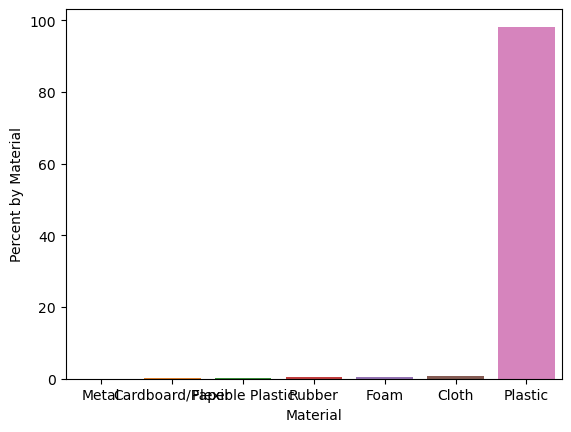

In [141]:
sns.barplot(materials_summary, x='Material', y='Percent by Material');

# Ideas

- what's planned for 2025?
- historically how much is wood vs plastic?
- how much for 2025?
- estimate num children potential buyers in 2025
- extrapolate amt of plastic saved from future landfill


# draft questions

In [ ]:
# what are part_num = ideabooks? 

ideabook = sets_parts.loc[sets_parts['part_num'].str.contains('ideabook')]
ideabook

In [ ]:
# sets_themes = sets + themes
sets_themes = sets.merge(themes, left_on="theme_id", right_on='id')

# rename cols
sets_themes = (sets_themes.rename(columns={'name_x':'set_name', 'name_y':'theme_name'}))

# drop col id
sets_themes.drop(columns=['id'])

sets_themes.head(2)

In [ ]:
# sets_themes_inventories = sets_themes + inventories
sets_themes_inventories = sets_themes.merge(inventories, left_on='set_num', right_on='set_num')

sets_themes_inventories.head(2)

In [ ]:
# inventoryparts_colors = inventory_parts + colors
inventoryparts_colors = inventory_parts.merge(colors, left_on='color_id', right_on='id')

inventoryparts_colors.head(2)

In [ ]:
# inventoryparts_colors_parts = inventoryparts_colors + parts
inventoryparts_colors_parts = inventoryparts_colors.merge(parts, left_on='part_num', right_on='part_num')

# rename cols
inventoryparts_colors_parts = (inventoryparts_colors_parts.rename(
    columns={'name_x':'color_name','name_y':'part_name'}))

inventoryparts_colors_parts.head(2)